In [1]:
#importing librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [145]:
#importing  scikitlearn libraries for prediction and preprocssing purpose-
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder,PolynomialFeatures
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [14]:
df=pd.read_csv("C:\\Users\\Gaurav Pathak\\OneDrive\\Desktop\\Python dataset\\insurance.csv")

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
df["charges"]=np.round(df["charges"],2)


In [17]:
df['bmi']=np.round(df["bmi"],2)

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Train-test and split of model--

In [46]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns="charges"),df["charges"],test_size=0.2,random_state=42)

# Here, I have used Transformer under which feature Engineering and  prediction executed.using pipelining

In [199]:
#one hot encoding----
trf1=ColumnTransformer([("trf1",OneHotEncoder(sparse=False,
                        handle_unknown="ignore",drop="first"),[1,4,5])],remainder="passthrough")

In [200]:
#scaling--
trf2=ColumnTransformer([("trf2",StandardScaler(),slice(0,7))])

In [201]:
trf=ColumnTransformer([("trf",PolynomialFeatures(degree=2,include_bias=True),slice(0,7))])

In [202]:
#train model--
trf3=Lasso(alpha=0.1)

In [203]:
from sklearn import set_config
set_config(display="diagram")

In [204]:
#pipelining--
pipe=make_pipeline(trf1,trf2,trf,trf3)

In [205]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf1',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 4, 5])])),
                ('columntransformer-2',
                 ColumnTransformer(transformers=[('trf2', StandardScaler(),
                                                  slice(0, 7, None))])),
                ('columntransformer-3',
                 ColumnTransformer(transformers=[('trf', PolynomialFeatures(),
                                                  slice(0, 7, None))])),
                ('lasso', Lasso(alpha=0.1))])

In [206]:
pipe.named_steps

{'columntransformer-1': ColumnTransformer(remainder='passthrough',
                   transformers=[('trf1',
                                  OneHotEncoder(drop='first',
                                                handle_unknown='ignore',
                                                sparse=False),
                                  [1, 4, 5])]),
 'columntransformer-2': ColumnTransformer(transformers=[('trf2', StandardScaler(), slice(0, 7, None))]),
 'columntransformer-3': ColumnTransformer(transformers=[('trf', PolynomialFeatures(),
                                  slice(0, 7, None))]),
 'lasso': Lasso(alpha=0.1)}

In [207]:
pipe.named_steps['columntransformer-1'].transformers_[0][1]

OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

In [208]:
y_pred=pipe.predict(x_test)

In [209]:
r2_score(y_test,y_pred)

0.861060266938059

In [219]:
#cross validation score
from sklearn.model_selection import cross_val_score
cross_val_score(pipe,x_train,y_train,cv=10,scoring="r2").mean()

0.82242191772532

Text(0, 0.5, 'test predicted data')

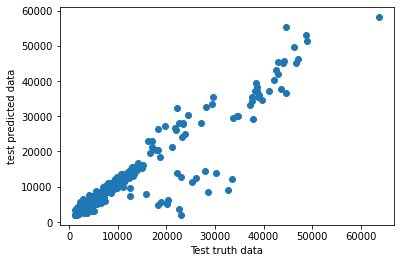

In [220]:
plt.scatter(y_test,y_pred) #if this graph will show linear relation then it is good prediction
plt.xlabel("Test truth data")
plt.ylabel("test predicted data")

<AxesSubplot: xlabel='charges', ylabel='Density'>

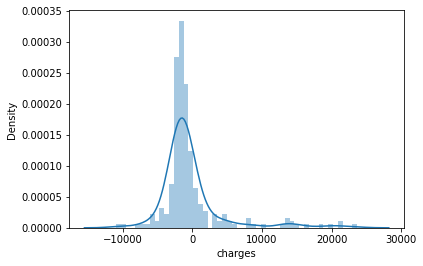

In [221]:
residuals=y_test-y_pred #if this will show normal distribution then it is fit
sns.distplot(residuals,kde=True)

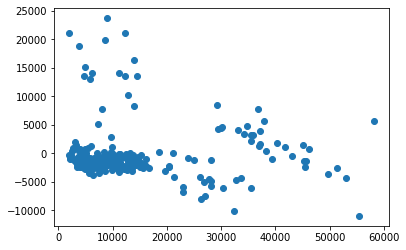

In [222]:
plt.scatter(y_pred,residuals) # it is used to measure the accuraxy of model
                              #it is randomly or uniformly distributed 